In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [2]:
# 1. Memuat data
# Asumsikan data Anda dalam bentuk berikut
# data = {'text': ["komentar1", "komentar2", ...], 'label': [0, 1, ...]}
data = pd.read_csv('dataset-judol-final.csv', encoding='utf-8')  # Ganti dengan path ke file dataset Anda

In [3]:
data

,label,author,comment,video_id,channel,title
0,1,lukman8584,𝙒𝙄𝘽𝙐69𝙅𝙋 Memberikan Pelayanan Terbaik Sepanjan...,153XPkkQbxo,KOMPASTV,Blak-blakan! Menteri ESDM Bahlil soal Aturan B...
1,0,sorasore132,Dia ingin membantu rakyat tapi dengan cara yan...,153XPkkQbxo,KOMPASTV,Blak-blakan! Menteri ESDM Bahlil soal Aturan B...
2,1,nirvanasound4361,"Tiap hari ada aja hal baru di 𝐀Е𝐑𝑂𝟾𝟖, bikin pe...",153XPkkQbxo,KOMPASTV,Blak-blakan! Menteri ESDM Bahlil soal Aturan B...
3,1,asepruswandi5091,"𝘼G𝘜𝘚𝘛О𝙏О modal tipis doang, gua lngsg WEDEY gede",153XPkkQbxo,KOMPASTV,Blak-blakan! Menteri ESDM Bahlil soal Aturan B...
4,1,anwarsopian-p8j,🆂🅴🅺🅰🆁🅰🅽🅶 ❗ 🅳🅸 🅺🆄🅽🅶 🆂🅴🆁🅾🅽🅾 🅹🆄🅳🅸 🎲 🎰 𝕞𝕒𝕚𝕟 𝕡𝕠𝕜𝕖𝕣 ...,153XPkkQbxo,KOMPASTV,Blak-blakan! Menteri ESDM Bahlil soal Aturan B...
...,...,...,...,...,...,...
894,0,RahmadKunanto-ye9kl,"Mau memoermudah malah mempersulit rakyat,,",TerK02wFTz0,tvOneNews,"Warga Protes Buang Tabung Gas LPG 3 Kg, Dampak..."
895,1,willykristian8971,BURUAN ABSEN YANG UDAH PADA COBAIN 𝙒𝙄𝘽𝙐69𝙅𝙋 ?,TerK02wFTz0,tvOneNews,"Warga Protes Buang Tabung Gas LPG 3 Kg, Dampak..."
896,0,hamidahusni8307,Sangat mempersulit rakyat kecil...,TerK02wFTz0,tvOneNews,"Warga Protes Buang Tabung Gas LPG 3 Kg, Dampak..."
897,0,y_putra,sengaja bgt bikin gaduh biar pagar laut dilupa...,TerK02wFTz0,tvOneNews,"Warga Protes Buang Tabung Gas LPG 3 Kg, Dampak..."


In [4]:

# 2. Preprocessing Teks
# Tokenisasi teks
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['comment'])
sequences = tokenizer.texts_to_sequences(data['comment'])
x_data = pad_sequences(sequences, maxlen=max_len)

# Mengubah label menjadi bentuk numpy array
y_data = np.array(data['label'])

In [5]:
# 3. Membangun Model LSTM
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [6]:
# 4. Kompilasi dan Pelatihan Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Membagi data menjadi data pelatihan dan validasi
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/10


23/23 [==============================] - 9s 118ms/step - loss: 0.6685 - accuracy: 0.5828 - val_loss: 0.6172 - val_accuracy: 0.7500
Epoch 2/10
23/23 [==============================] - 1s 60ms/step - loss: 0.4700 - accuracy: 0.8234 - val_loss: 0.3189 - val_accuracy: 0.8611
Epoch 3/10
23/23 [==============================] - 1s 62ms/step - loss: 0.4161 - accuracy: 0.9110 - val_loss: 0.2312 - val_accuracy: 0.9167
Epoch 4/10
23/23 [==============================] - 1s 65ms/step - loss: 0.0993 - accuracy: 0.9917 - val_loss: 0.2014 - val_accuracy: 0.9111
Epoch 5/10
23/23 [==============================] - 1s 65ms/step - loss: 0.0565 - accuracy: 0.9958 - val_loss: 0.2248 - val_accuracy: 0.8889
Epoch 6/10
23/23 [==============================] - 1s 61ms/step - loss: 0.0359 - accuracy: 0.9986 - val_loss: 0.2334 - val_accuracy: 0.8944
Epoch 7/10
23/23 [==============================] - 2s 68ms/step - loss: 0.0314 - accuracy: 0.9972 - val_loss: 0.1943 - val_accuracy: 0.9167
Epoch 8/1

In [7]:
# 5. Evaluasi Model
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Loss: {loss}, Accuracy: {accuracy}")

6/6 [==============================] - 0s 18ms/step - loss: 0.2757 - accuracy: 0.8944
Loss: 0.2757229208946228, Accuracy: 0.894444465637207


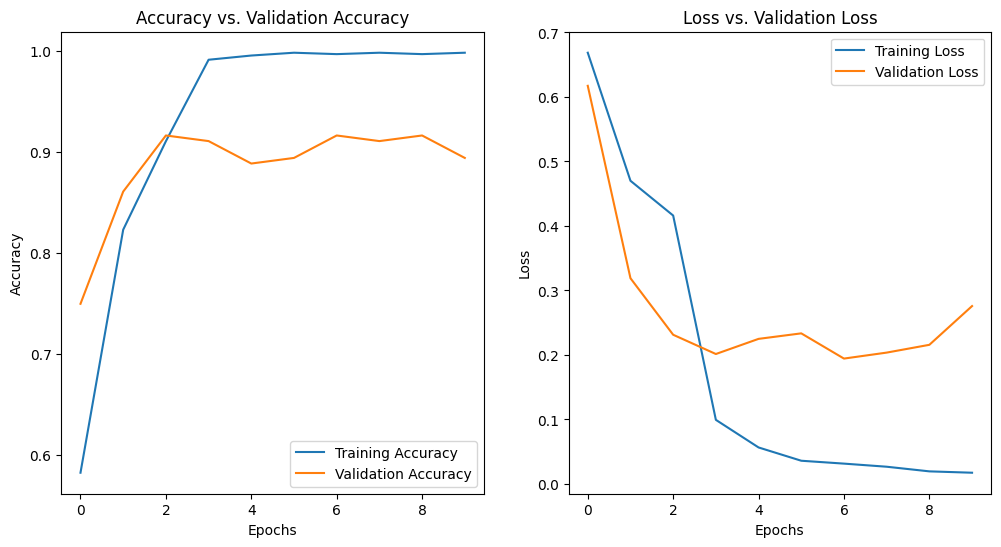

In [8]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [22]:
model.save('model.h5')

c:\Users\diash\anaconda3\envs\cybersecurity\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
import tensorflow as tf

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Allow TensorFlow operations and disable experimental lowering
converter.target_spec.supported_ops = [
    tf.lite.OpsSet.TFLITE_BUILTINS,  # Enable TensorFlow Lite ops.
    tf.lite.OpsSet.SELECT_TF_OPS     # Enable TensorFlow ops.
]
converter._experimental_lower_tensor_list_ops = False

# Convert the model
tflite_model = converter.convert()

# Save the model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\diash\AppData\Local\Temp\tmp60mr9j4f\assets


INFO:tensorflow:Assets written to: C:\Users\diash\AppData\Local\Temp\tmp60mr9j4f\assets
